**Context:** Developing a AIML model which can predict the  condition of the patient depending on the received test results.

**DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and  orientation of the condition to their body part.

In [1]:
#exploring the dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Read CSVs
normal = pd.read_csv('Normal.csv')
type_s = pd.read_csv('Type_H.csv')
type_h = pd.read_csv('Type_S.csv')

In [6]:
# Shapes of 3 dataframes
print(normal.shape)
print(type_s.shape)
print(type_h.shape)

(100, 7)
(60, 7)
(150, 7)


In [7]:
print(normal['Class'].value_counts())
print('*****'*10)
print(type_s['Class'].value_counts())
print('*****'*10)
print(type_h['Class'].value_counts())
print('*****'*10)

Normal    73
Nrmal     27
Name: Class, dtype: int64
**************************************************
Type_H    37
type_h    23
Name: Class, dtype: int64
**************************************************
Type_S    133
tp_s       17
Name: Class, dtype: int64
**************************************************


# Data Preparation and Exploration

In [8]:
normal['Class'] = normal['Class'].apply(lambda x: 'normal')
type_s['Class'] = type_s['Class'].apply(lambda x: 'type_s')
type_h['Class'] = type_h['Class'].apply(lambda x: 'type_h')


In [9]:
df = normal.append([type_h,type_s])

C:\Users\kulks\AppData\Local\Temp\ipykernel_17384\3452219992.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = normal.append([type_h,type_s])


In [10]:
df.shape

(310, 7)

In [11]:
df['Class'].value_counts()

type_h    150
normal    100
type_s     60
Name: Class, dtype: int64

In [12]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
31,46.390260,11.079047,32.136553,35.311213,98.774546,6.386832,type_s
16,63.959522,16.060945,63.123736,47.898577,142.360125,6.298971,normal
20,65.611802,23.137919,62.582179,42.473883,124.128001,-4.083298,normal
6,78.491730,22.181798,60.000000,56.309932,118.530327,27.383213,type_h
59,60.753893,15.753894,43.199158,45.000000,113.053331,31.693548,type_h


In [13]:
df.isna().sum()/len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [14]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# Data Analysis

C:\Users\kulks\AppData\Local\Temp\ipykernel_17384\1816386778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',annot=True)


<Axes: >

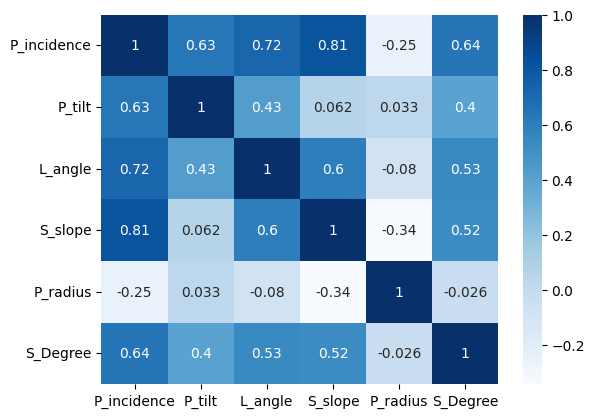

In [15]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

#### 1. S_slope and P_incidence is having stronger positive correlation i.e. 0.81.
#### 2. L_angle and P_incidence is having stronger positive correlation i.e. 0.72.
#### 3. P_tilt is having weaker correlation with S_Slope and P_radius respectively with values 0.062 and 0.033.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [17]:
# The duplicated index will cause an error, so trying to reset the index
df.reset_index(inplace=True)

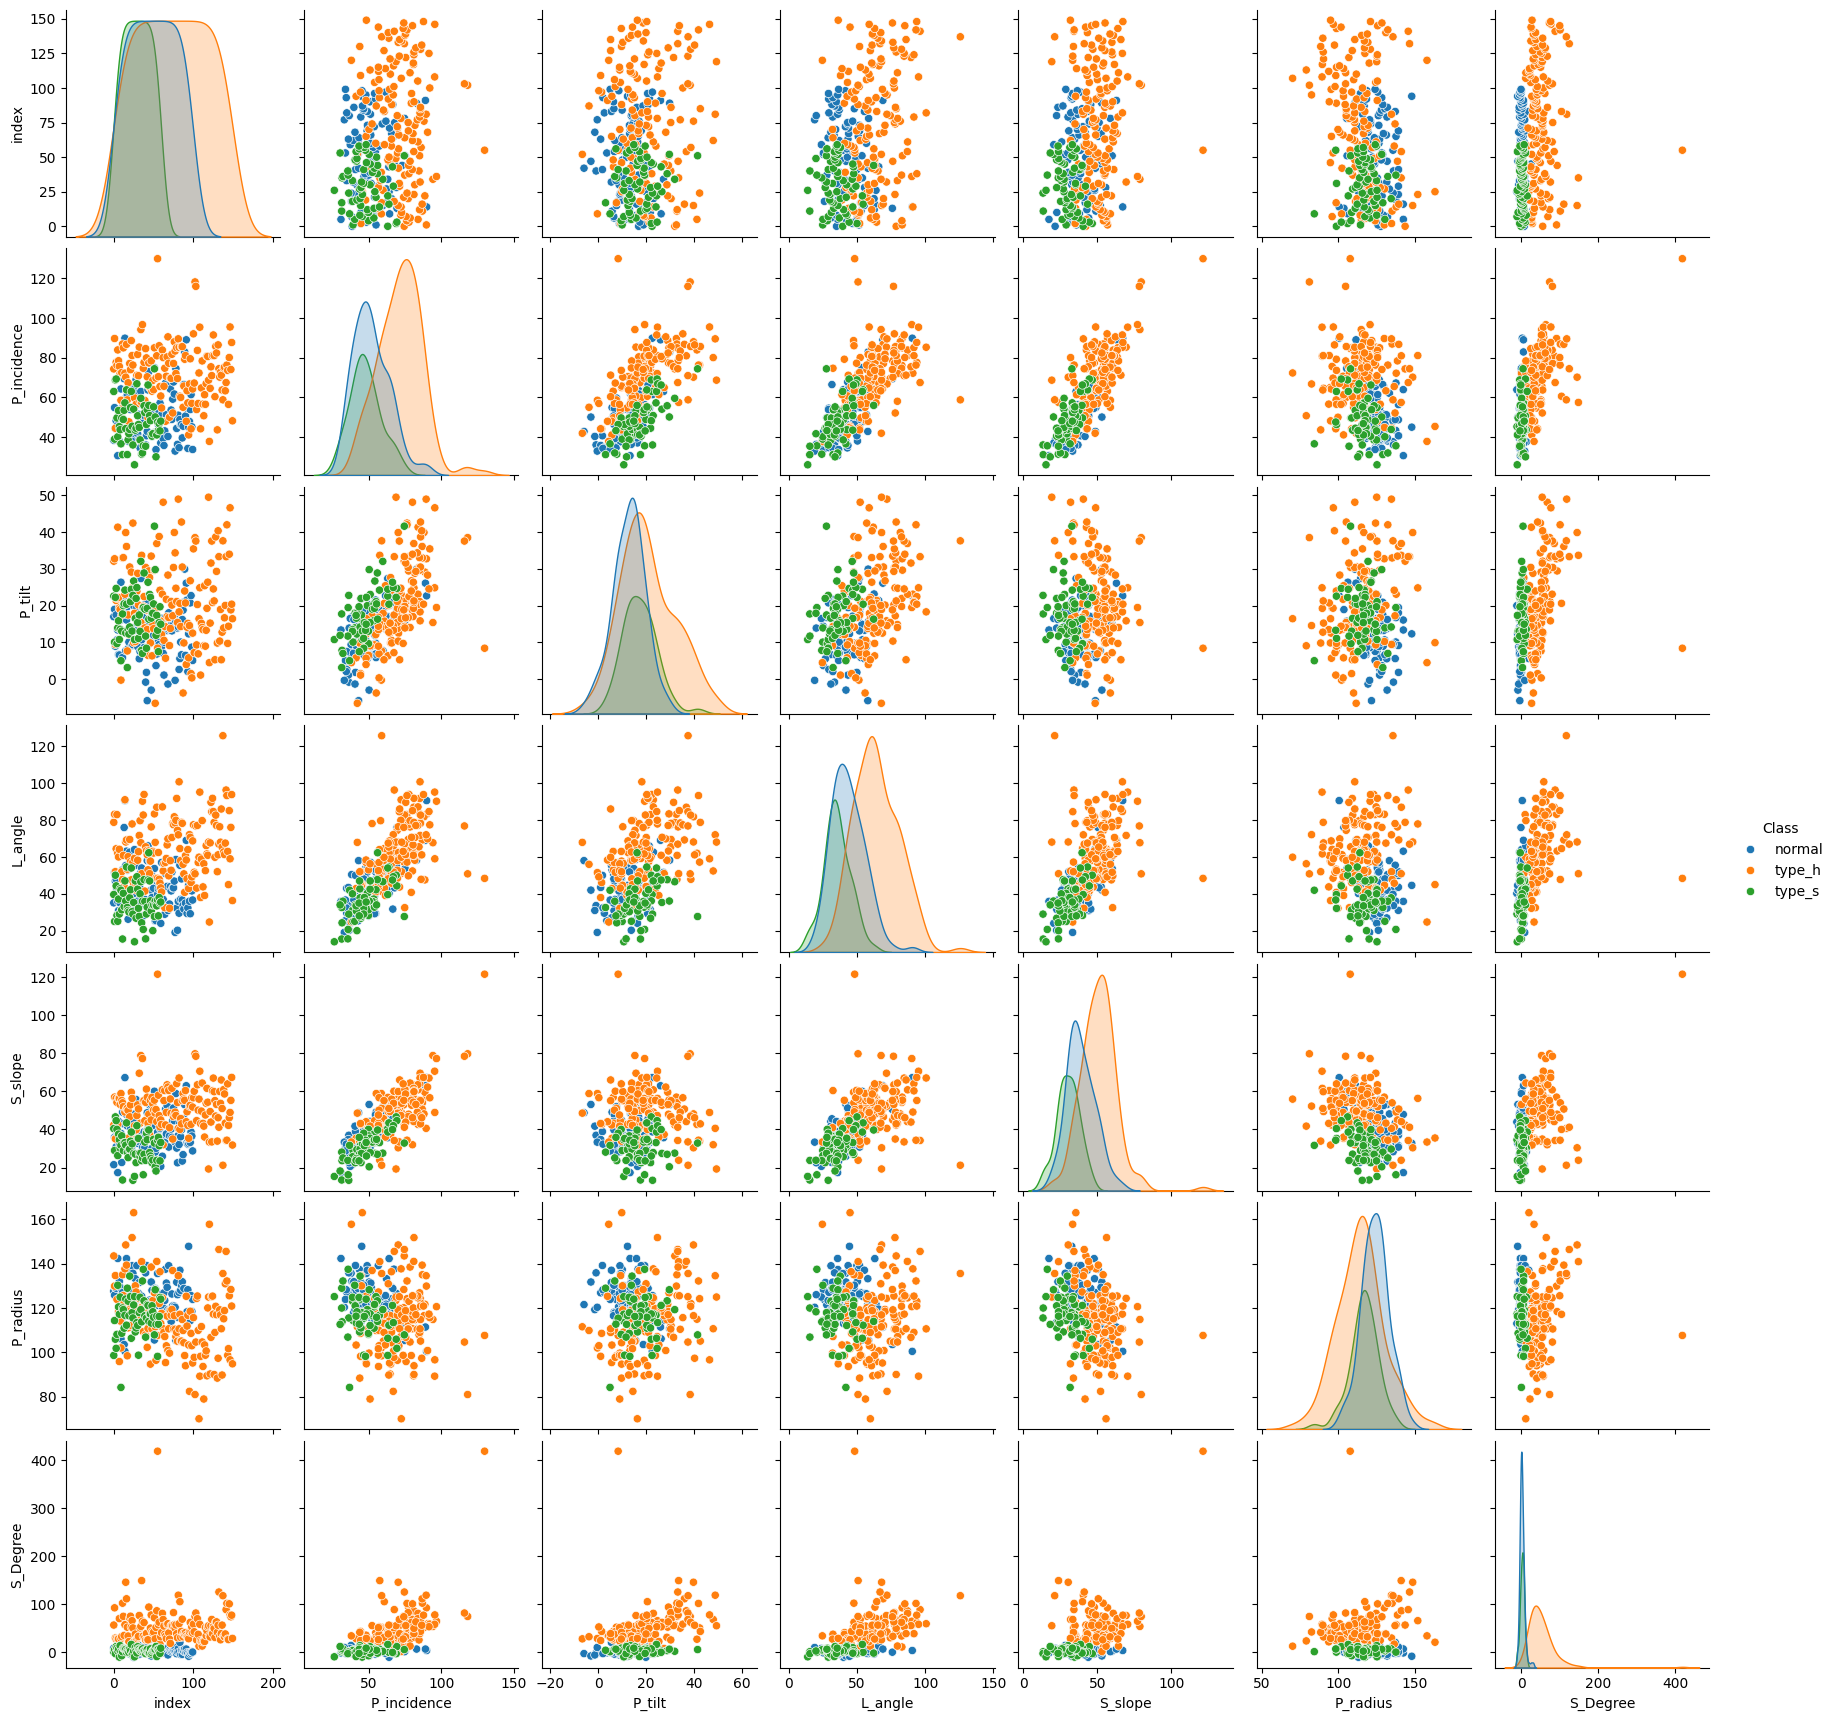

In [18]:
sns.pairplot(df,hue='Class')

#### 1. Normal distribution is observed for all the 3 classes separately for all the features except few
#### 2. type_h datapoints are observed to have higher values for all the features

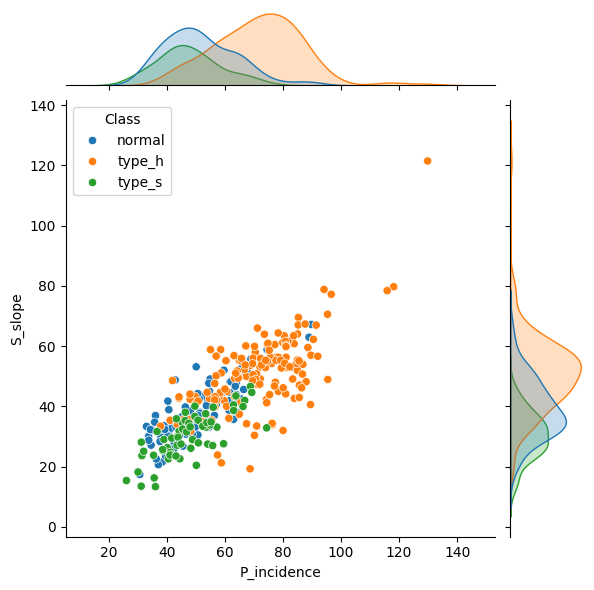

In [20]:
sns.jointplot(x='P_incidence', y='S_slope', data=df, hue='Class')

#### P_incidnece and S_slope are having strong linear relationship.
#### Skewness is observed in both the casese for all the 3 classes separately.

In [21]:
df.columns

Index(['index', 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius',
       'S_Degree', 'Class'],
      dtype='object')

<Axes: xlabel='Class', ylabel='S_slope'>

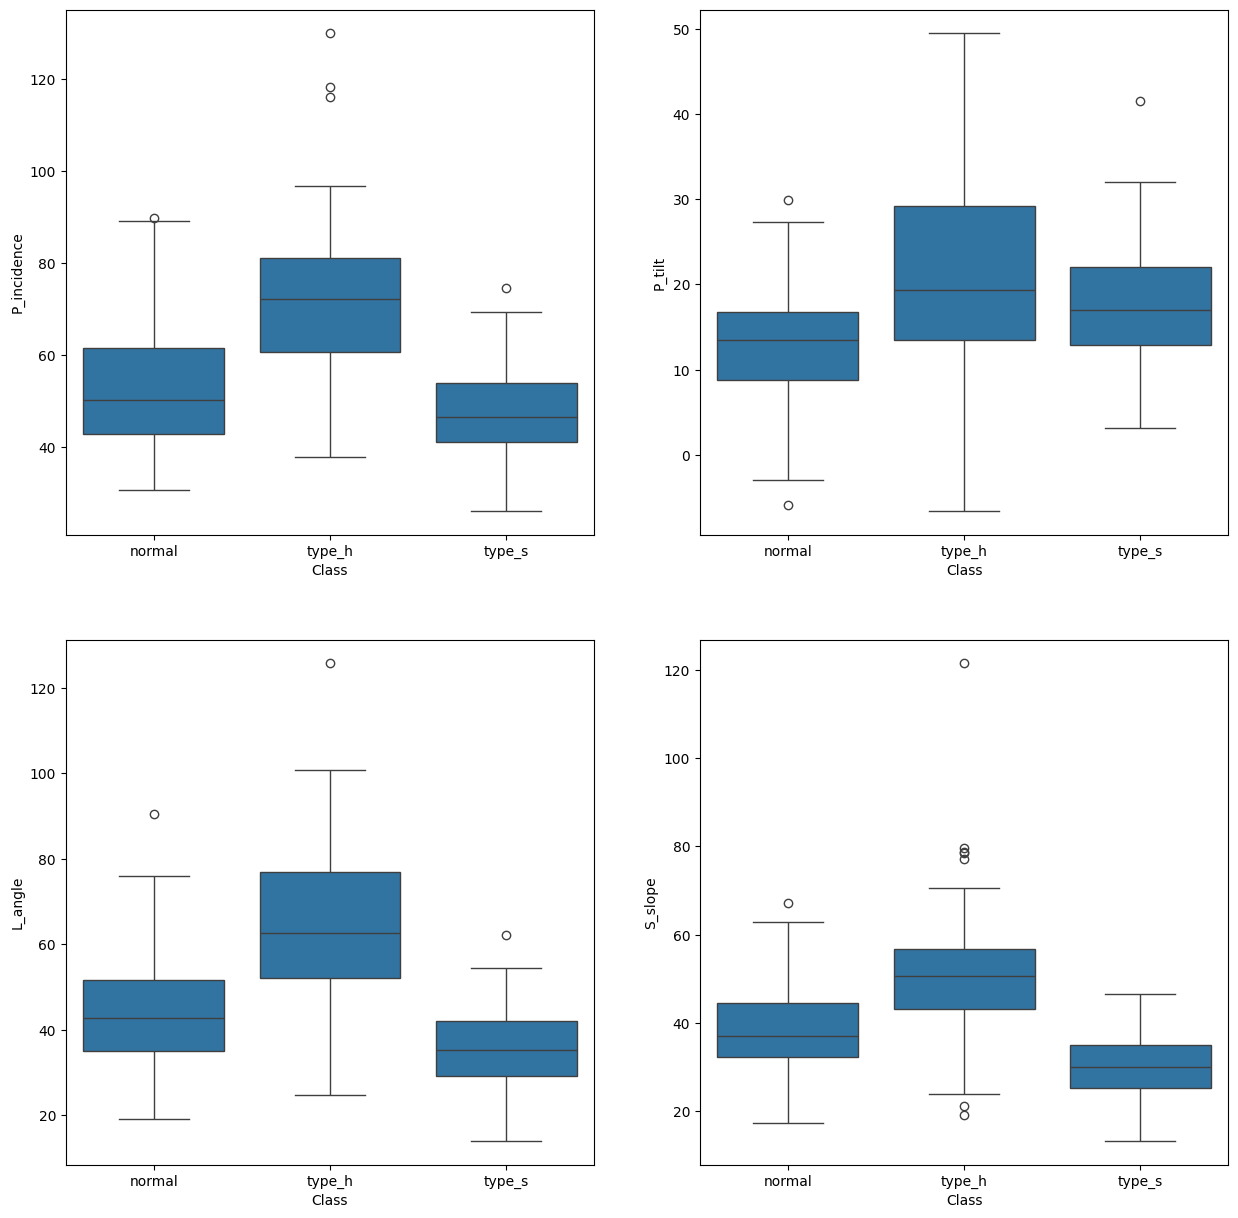

In [22]:
f, axes = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(15)
sns.boxplot(  y="P_incidence", x= "Class", data=df,  orient='v' , ax=axes[0][0])
sns.boxplot(  y="P_tilt", x= "Class", data=df,  orient='v' , ax=axes[0][1])
sns.boxplot(  y="L_angle", x= "Class", data=df,  orient='v' , ax=axes[1][0])
sns.boxplot(  y="S_slope", x= "Class", data=df,  orient='v' , ax=axes[1][1])

#### Outliers observed in the features: S_slope, P_incidence

# Model Building

In [23]:
X = df.drop('Class',axis=1)
y = df['Class']

In [24]:
x_train, x_test,y_train,y_test = train_test_split(X,y,random_state=67,test_size=.2)

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [28]:
#D
print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*40)
print("Test Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*40)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*40)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*40)

Train Accuracy is:  0.8951612903225806
****************************************
Test Accuracy is:  0.8709677419354839
****************************************
Training metrics: 
               precision    recall  f1-score   support

      normal       0.83      0.85      0.84        82
      type_h       0.98      0.94      0.96       121
      type_s       0.79      0.84      0.82        45

    accuracy                           0.90       248
   macro avg       0.87      0.88      0.87       248
weighted avg       0.90      0.90      0.90       248

****************************************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.81      0.72      0.76        18
      type_h       0.96      0.93      0.95        29
      type_s       0.78      0.93      0.85        15

    accuracy                           0.87        62
   macro avg       0.85      0.86      0.85        62
weighted avg       0.88      0.87      0.87        62


# Performance Improvement

In [29]:
knn_1 = KNeighborsClassifier(n_neighbors=25,algorithm='ball_tree',weights='distance',p=2)
knn_1.fit(x_train,y_train)
train_pred = knn_1.predict(x_train)
test_pred = knn_1.predict(x_test)

print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*40)
print("Test Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*40)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*40)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*40)

Train Accuracy is:  1.0
****************************************
Test Accuracy is:  0.9032258064516129
****************************************
Training metrics: 
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        82
      type_h       1.00      1.00      1.00       121
      type_s       1.00      1.00      1.00        45

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

****************************************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.83      0.83      0.83        18
      type_h       1.00      0.93      0.96        29
      type_s       0.82      0.93      0.88        15

    accuracy                           0.90        62
   macro avg       0.89      0.90      0.89        62
weighted avg       0.91      0.90      0.90        62

**************

1. Training accuracy has gone up by 10%
2. Testing Precision and recall values of type_h have gone up by 4% by compromising 'type_s' and 'normal'

- Parameter 'weights' = 'distance' played key role in improving training accuracy
- When 'weights' = 'distance' has higher influence of neighboring datapoints instead of uniform resulting into better predictions.